# Lab 07

### Kamil Burkiewicz

#### Imports

In [1]:
from automaton import Automaton, RegexIterator
import matplotlib.pyplot as plt
import string
import random
import numpy as np
from termcolor import colored
from timeit import default_timer as timer
from datetime import timedelta

import re  # only for test purposes - whole functional code is in automaton module

### Idea
&emsp; It is well known fact [[2]](#automata), that DFA (Deterministic Finite Automaton), NFA (Nondeterministic Finite Automaton), NFA-$\normalsize\varepsilon$(Nondeterministic Finite Automaton with $\normalsize\varepsilon$-moves) and RE(Regular expression) describe the same class of formal languages. The classical proof is based on idea, that we can simulate NFA on DFA, NFA-$\normalsize\varepsilon$ on NFA, RE on NFA-$\normalsize\varepsilon$ and for every DFA there exists RE generating the same language. The part of this proof, we are interested in, is simulating RE on NFA-$\normalsize\varepsilon$ and our interest comes from the fact, that this proof is purely constructive (of course with some induction, showing that the obtained result is correct). The parts of this construction is shown in pictures below - two automatons for symbols 'a' and 'b' and automatons for their concatenation 'ab', sum 'a+b' and Kleene closure 'a\*'. It is possible for every RE to construct NFA-$\normalsize\varepsilon$, which accepts the same language and that means we can use it for standard RE, on which we will base our regex pattern matching.

The idea is to build nondeterministic finite automaton from given regular expression and make regex matching with this automaton. Construction is done recursively by functions presented in [[1]](#text_algorithms) (in chapter 7.3). Matching is also covered in this position and we need to change the presented pseudocode to version, which can be written in Python. However, there is a simple problem with those functions, which needs attention and modification of matching algorithm. There are only a method of finding the end of the subword, but not the subword as whole and if we want the unix-like regex, the algorithm should find whole expression and not only the end. In my opinion, there can be only two possible solutions for this - memoize the beginning of the subword while processing text or recreating the start position afterwards. Both solutions have their benefits and drawbacks, but I have chosen the first one. Trials to make implementation the most effective as possible, created a minor problem, which are epsilon cycles in automaton (which I believe are avoidable, yet need an extra effort and much time) f.e. for expression (a?)\*, but those easily fit in the criteria of incorrect expression (what does it mean - one or no symbol repeated zero or more times? the absence of character is used twice in this regex and this is incorrect; should be a\*, what means basically the same).

Moreover, the exercise require to use Unix regular expressions, which differ in some ways from standard mathematical ones, but it is not very hard to change those into standard regular expression from formal languages and automata theory.

We have following symbols for Unix regular expressions features implemented:
- ascii lowercase and uppercase letters, digits, spaces
- '.' - dot for any character
- '*' - zero or more of previous, '+' - one or more of previous, '?' - zero or one of previous; parentheses, which can be used for grouping of symbols
- character classes:
    - with [], any character, which is between square brackets
    - \d - any digit
    - \w - any word character - letters or digits
    - \a - any ascii letter

<IPython.core.display.Javascript object>


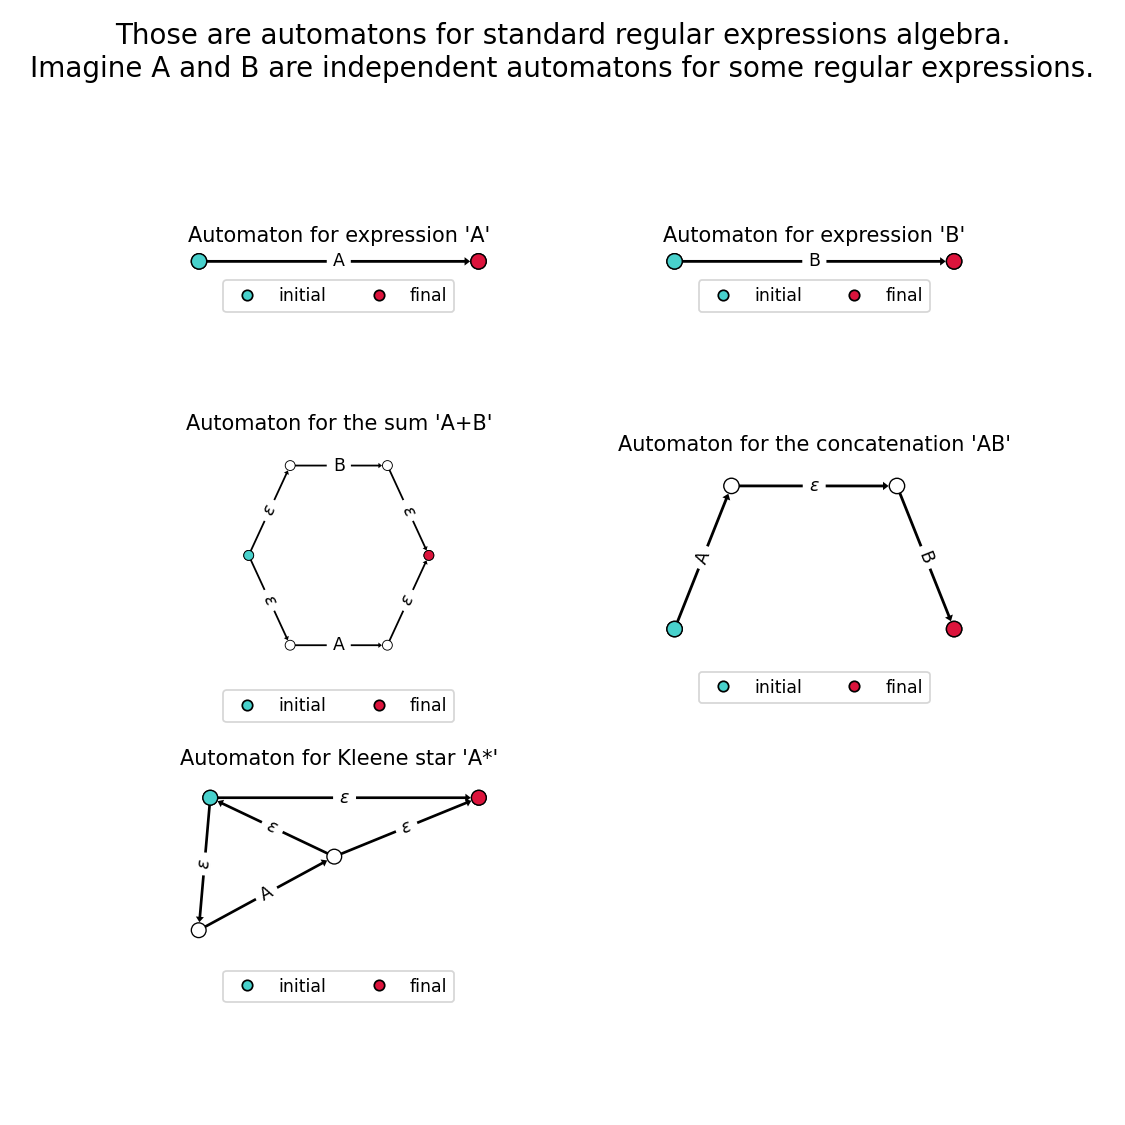

In [5]:
%matplotlib notebook
fig, axes = plt.subplots(3, 2, figsize=(9, 9))
automaton_a = Automaton("A")
automaton_b = Automaton("B")
automaton_a.draw(axes[0, 0], title="Automaton for expression 'A'",
                 node_label_font_size=6)
automaton_b.draw(axes[0, 1], title="Automaton for expression 'B'",
                 node_label_font_size=6)
(automaton_a + automaton_b).draw(axes[1, 0],
                                 title="Automaton for the sum 'A+B'",
                                 node_label_font_size=4)
(automaton_a * automaton_b).draw(axes[1, 1],
                                 title="Automaton for the concatenation 'AB'",
                                 node_label_font_size=4)
automaton_a.star().draw(axes[2, 0], title="Automaton for Kleene star 'A*'",
                        node_label_font_size=4)

# Hide axes [2, 1]
axes[2, 1].axis('off')
fig.suptitle("Those are automatons for standard regular expressions algebra.\n"
             "Imagine A and B are independent automatons for some regular expressions.",
             fontsize=16)
plt.show()

### Comment
Below we can see the automaton for some Unix regular expression and also a standard regular expression containing the same information.

<IPython.core.display.Javascript object>


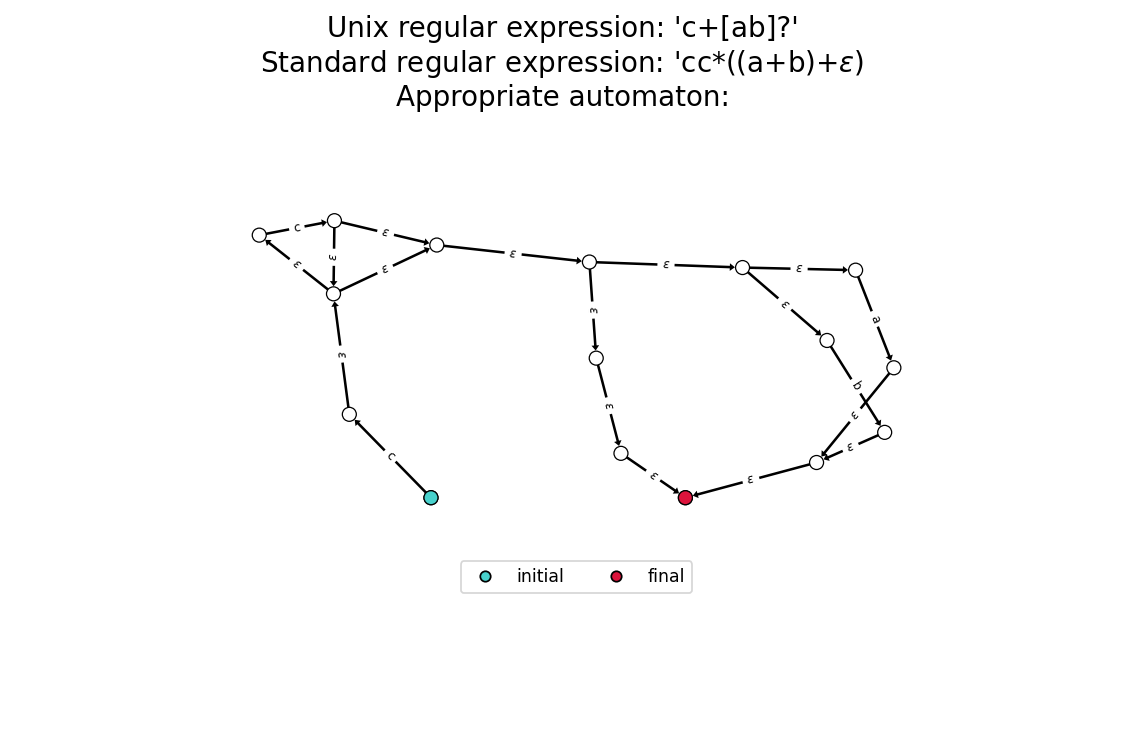

In [8]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize=(9,6))
regex = "c+[ab]?"
regex_iter = RegexIterator(regex) # RegexIterator performs a change of re to standard form.
Automaton.build_from_regex(regex).draw(ax, edge_label_size=7, title="")
fig.suptitle(f"Unix regular expression: '{regex}'\n" +
             "Standard regular expression: '" +
             str(regex_iter.regex.replace('?', '$\epsilon$')) +
             "\nAppropriate automaton:", fontsize=16)
plt.show()

### Comment
Here we have example of wrong regular expressions and appropriate automatons with $\normalsize\varepsilon$-cycles. We can see in code that the option <b>check_correctness</b> is set to <b>False</b>, so that automaton class does not make check for $\normalsize\varepsilon$-cycles. The check is performed by DFS, so its time complexity is $O(V+E)=O(V+2V)=O(V)$, where $V$ is number of states, so there is no rise of time complexity assymptotically.

<IPython.core.display.Javascript object>


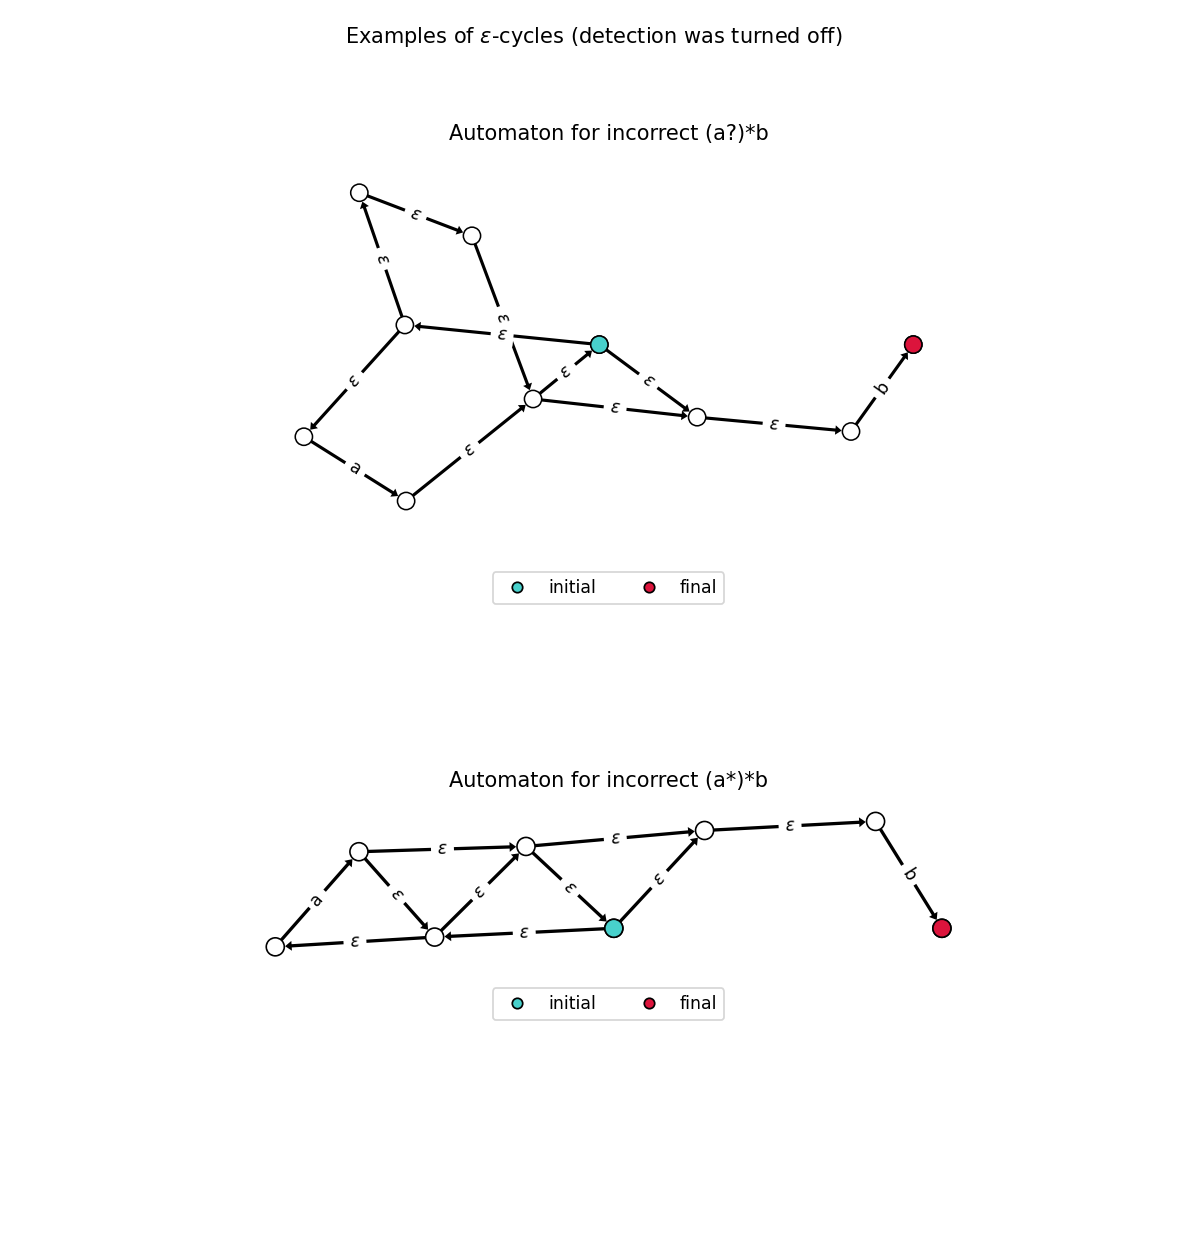

In [9]:
fig, axes = plt.subplots(2, figsize=(9.5, 10))
Automaton.build_from_regex("(a?)*b", check_correctness=False).draw(axes[0],
                                        title="Automaton for incorrect (a?)*b")
Automaton.build_from_regex("(a*)*b", check_correctness=False).draw(axes[1],
                                        title="Automaton for incorrect (a*)*b")
fig.suptitle("Examples of $\epsilon$-cycles (detection was turned off)")
plt.show()

### Tests

In [10]:
def check_correctness(occurrences, pattern, text):
    print(colored("\n\nIs correct = "
    f"{str([text[oc[0]: oc[1]] for oc in occurrences] == re.compile(regex).findall(text))}",
            color='red'), end="\n\n")   

In [11]:
regex = "[lL]\w*[Ee]"
text = """Mikhail Lermontov

'I Come Out To the Path...'

I come out to the path, alone,
Night and wildness are referred to God,
Through the mist, the road gleams with stone,
Stars are speaking in the shinning lot.

There is grave and wonderful in heaven;
Earth is sleeping in a pale-blue light...
Why is then my heart such pined and heavy?
Is it waiting or regretting plight?

I expect that nothing more goes,
And for past I do not have regret,
I wish only freedom and repose,
I would fall asleep and all forget...

I would like to fall asleep forever,
But without cold sleep of death:
Let my breast be full of dozing fervor
For the life, and heave in gentle breath;

So that enchanting voice would ready
Day and night to sing to me of love,
And the oak, evergreen and shady,
Would decline to me and rustle above."""

automaton = Automaton.build_from_regex(regex)
occurrences = automaton.matching(text)

check_correctness(occurrences, regex, text)

text = """Mikhail Lermontov

'Cossack Lullaby'

Sleep, my fine young baby
Lullabye, a-bye.
Quietly the clear moon looks down
Into your cradle
I will tell you stories,
I will sing you a song,
Sleep on, close your eyes,
Lullabye, a-bye.

The Terek runs over its rocky bed
And splashes its dark wave;
A sly brigand crawls along the bank
Sharpening his dagger;
But your father is an old warrior
Hardened in battle;
So sleep, my darling, undisturbed,
Lullaby a-bye.

The time will come, you will learn for yourself
The soldier's way of life,
Boldly you'll place your foot in the stirrup
And grasp your rifle.
Your fighting saddle I myself
Will embroider with silk
Sleep, my darling, my own one,
Lullaby a-bye.

Such a fine warrior you'll be to look at,
And a cossack in your soul.
I will watch you go, see you on your way,
And you'll wave your hand.
How many bitter tears silently
I will weep on that night when you go.
Sleep my angel, sweetly, softly,
Lullaby a-bye."""

print()

occurrences = automaton.matching(text)

check_correctness(occurrences, regex, text)

Mikhail Lermontov

'I Come Out To the Path...'

I come out to the path, alone,
Night and wildness are referred to God,
Through the mist, the road gleams with stone,
Stars are speaking in the shinning lot.

There is grave and wonderful in heaven;
Earth is sleeping in a pale-blue light...
Why is then my heart such pined and heavy?
Is it waiting or regretting plight?

I expect that nothing more goes,
And for past I do not have regret,
I wish only freedom and repose,
I would fall asleep and all forget...

I would like to fall asleep forever,
But without cold sleep of death:
Let my breast be full of dozing fervor
For the life, and heave in gentle breath;

So that enchanting voice would ready
Day and night to sing to me of love,
And the oak, evergreen and shady,
Would decline to me and rustle above.


Is correct = True


Mikhail Lermontov

'Cossack Lullaby'

Sleep, my fine young baby
Lullabye, a-bye.
Quietly the clear moon looks down
Into your cradle
I will tell you stories,
I will sing you 

In [14]:
regex = "[ls]*b?a"
automaton = Automaton.build_from_regex(regex)

text = "lsa ll babblsbas"
occurrences = automaton.matching(text)

check_correctness(occurrences, regex, text)

text = "kamilslimak kamilslimak"
occurrences = automaton.matching(text)

check_correctness(occurrences, regex, text)

lsa ll babblsbas


Is correct = True

kamilslimak kamilslimak


Is correct = True



In [82]:
regex = "ab*(a(b[def])?c+)*\d+"
automaton = Automaton.build_from_regex(regex)
text = "abba a0 abacacacabecc170 a1bacacacabefcc170"
automaton.matching(text)

abba a0 abacacacabecc170 a1bacacacabefcc170


[(5, 7), (8, 24), (25, 27)]

In [19]:
# Example of pataterns crossing
regex = " ?\w* ?"
automaton = Automaton.build_from_regex(regex)
text = "Money Money Money"
print(text)
occurrences = automaton.matching(text)
print(f"My result  \t{[text[oc[0]: oc[1]] for oc in occurrences]}")
print(f"re package \t{re.findall(regex, text)}")

Money Money Money
Money Money Money
My result  	['Money ', ' Money ', ' Money']
re package 	['Money ', 'Money ', 'Money', '']


#### Comment
We can see that results are correct.

In the last test we can see that own regular expression matching was better - it matched the biggest chunks even though they were intersecting. It is because used algorithm tries to match the biggest expression it can.

#### Comment
It is also possible for some regular expression $re$ to test if word is an element of a language $L(re)$.

In [23]:
regex = "ab*a?"
automaton = Automaton.build_from_regex(regex)
word = ""
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")
word = "abba"
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")
word = "a"
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")
word = "b"
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")
word = "aa"
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")
word = "abbbbbbbbbbbbbbbbbbbbb"
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")
word = "abbbbbbbbbbbbbbbbbbbbab"
print(f"word: '{word}'\tin L({regex}) == {automaton.test_word(word)}")

word: ''	in L(ab*a?) == False
word: 'abba'	in L(ab*a?) == True
word: 'a'	in L(ab*a?) == True
word: 'b'	in L(ab*a?) == False
word: 'aa'	in L(ab*a?) == True
word: 'abbbbbbbbbbbbbbbbbbbbb'	in L(ab*a?) == True
word: 'abbbbbbbbbbbbbbbbbbbbab'	in L(ab*a?) == False


### Time measurements methodology
Time measurements are done with default_timer function from timeit package. The measurement is done by measuring time before and after the instruction is performed. Then the first measurement is subtracted from latter and that is how we get the elapsed time. Measurement is repeated some times - usually from 5 to 10 to make results more credible. Then the average and standard deviation is calculated.

In [46]:
def timeit(func=None, num_of_repetitions=5):
    if (callable(None)):
        raise ValueError("func parameter is not callable")
        
    results = np.empty(num_of_repetitions)
    for i in range(num_of_repetitions):
        start = timer()
        func()
        end = timer()
        results[i] = (end - start) * 1000

    results = results[abs(results - np.mean(results)) < 1.5 * np.std(results)]
    
    avg = np.average(results)
    std = np.std(results)
    print(f"Measured: {avg} ms  +/- {std}")
    return avg, std

In [48]:
regex = "ab*(a(b[def])?c+)*\d+"

building_avgs = []
building_errs = []
xs = [2**i for i in range(10)]

for x in xs:
    avg, err = timeit(lambda: Automaton.build_from_regex(regex * x))
    building_avgs += [avg]
    building_errs += [err]

Measured: 2.1525250340346247 ms  +/- 0.4271342244767548
Measured: 4.483124968828633 ms  +/- 0.18692515864102022
Measured: 7.278725010110065 ms  +/- 0.9574305935812283
Measured: 15.199679997749627 ms  +/- 3.197943698888549
Measured: 14.327600016258657 ms  +/- 1.103080973542133
Measured: 30.866474990034476 ms  +/- 0.7061190354036031
Measured: 74.98559998930432 ms  +/- 5.89782279784617
Measured: 178.16250000032596 ms  +/- 49.50882198722802
Measured: 280.6117600062862 ms  +/- 39.798816689392105
Measured: 672.45637497399 ms  +/- 43.883203535555396


<IPython.core.display.Javascript object>


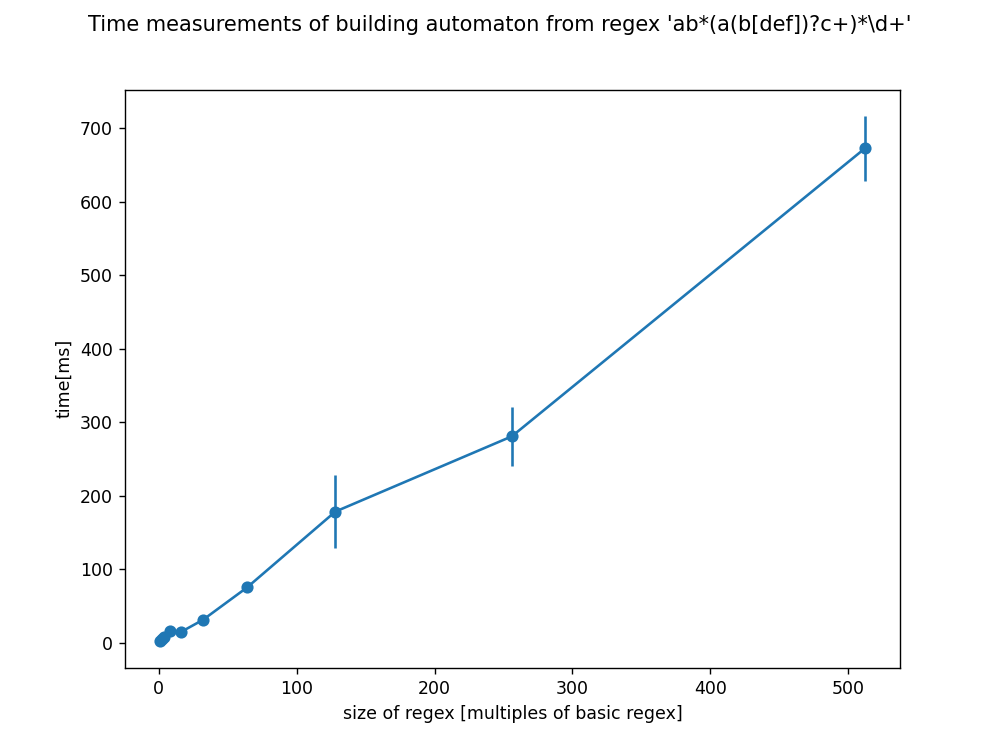

In [73]:
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.scatter(x=xs, y=building_avgs)
ax.errorbar(x=xs, y=building_avgs, yerr=building_errs)
fig.suptitle('Time measurements of building automaton from regex \'ab*(a(b[def])?c+)*\d+\'')
plt.ylabel('time[ms]')
plt.xlabel('size of regex [multiples of basic regex]')
plt.show()

#### Time Measurement Comment
The measurement was done for multiple concatenations of regex 'ab\*(a(b[def])?c+)\*\d+' with itself for ascending powers of two. Theoretically building should be done in linear time $O(size(regex))$. Here the performence is indeed linear, in spite of the fact that we are doing more things than simple building. We have here not standard regular expression, yet unix regular expression, which is translated to a standard one. This can easily more than double the size of the regular expression, if it contains nested parentheses. Also I perform correctness check in linear time and DFS $\normalsize\varepsilon$-cycle detection. All of these factors are behind the slope of the time curve, which is linear and match the theoretical predictions.

In [75]:
regex = "ab*(a(b[def])?c+)*\d+"
automaton = Automaton.build_from_regex(regex)

matching_avgs = []
matching_errs = []
xs = [1000 * 2**i for i in range(10)]

for x in xs:
    text = ''.join(random.choice(string.ascii_lowercase+string.digits) for i in range(x))
    avg, err = timeit(lambda:  automaton.matching(text, verbose=False), num_of_repetitions=10)
    matching_avgs += [avg]
    matching_errs += [err]

Measured: 14.489277809237441 ms  +/- 2.279535198478745
Measured: 24.930024999775924 ms  +/- 0.9773276641910041
Measured: 49.88413335134586 ms  +/- 1.643330391927526
Measured: 100.55397775593318 ms  +/- 3.5201090613402486
Measured: 197.3506555530346 ms  +/- 4.065158858552964
Measured: 420.45437780001924 ms  +/- 19.663361865056704
Measured: 816.4983777872598 ms  +/- 13.770482310273973
Measured: 1659.2247699736618 ms  +/- 39.1322176602753
Measured: 3349.4950750027783 ms  +/- 54.91066274377725
Measured: 6549.566888897162 ms  +/- 61.229992581359674


In [77]:
regex = "ab*c"
automaton = Automaton.build_from_regex(regex)

matching_avgs2 = []
matching_errs2 = []
xs = [1000 * 2**i for i in range(10)]

for x in xs:
    text = ''.join(random.choice(string.ascii_lowercase+string.digits) for i in range(x))
    avg, err = timeit(lambda:  automaton.matching(text, verbose=False), num_of_repetitions=10)
    matching_avgs2 += [avg]
    matching_errs2 += [err]

Measured: 11.099344442805481 ms  +/- 0.35119861734101804
Measured: 21.645937478751875 ms  +/- 0.15094902240092634
Measured: 47.580733352030315 ms  +/- 4.170639078873578
Measured: 86.99814999999944 ms  +/- 1.2060479826226707
Measured: 181.15139998392098 ms  +/- 8.273764195637462
Measured: 354.45551248267293 ms  +/- 6.404930506076504
Measured: 728.7558222370636 ms  +/- 14.0580213657552
Measured: 1457.985459989868 ms  +/- 35.813295687063544
Measured: 2887.5604555166015 ms  +/- 34.663148366654234
Measured: 5763.960911103317 ms  +/- 61.926633076730425


<IPython.core.display.Javascript object>


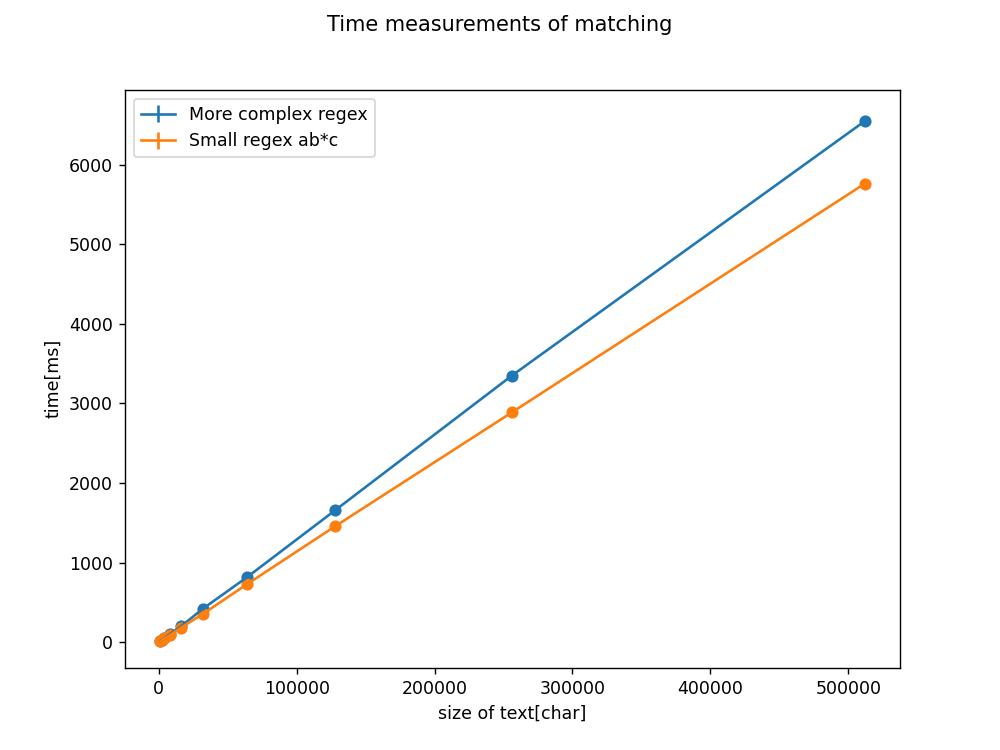

In [79]:
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.scatter(x=xs, y=matching_avgs)
ax.scatter(x=xs, y=matching_avgs2)
plot1 = ax.errorbar(x=xs, y=matching_avgs, yerr=matching_errs)
plot2 = ax.errorbar(x=xs, y=matching_avgs2, yerr=matching_errs2)
fig.suptitle('Time measurements of matching')
plt.ylabel('time[ms]')
plt.xlabel('size of text[char]')
plt.legend([plot1, plot2], ['More complex regex', 'Small regex ab*c'])
plt.show()

#### Time Measurement Comment
The measurement was done for multiple concatenations of random text containing digits and lowercase ascii letters with itself for ascending powers of two. It was made for the same regex as before - 'ab\*(a(b[def])?c+)\*\d+' and new one 'ab\*c'. The simplest pessimistic bound for used algorithm is $O(num\_of\_states \cdot length(text))$. For fixed size of an automaton, which are usually simple and small, the performence should be linear. Indeed, algorithm is linear with fixed regular expression size. Such high theoretical bound comes from the fact, that presented algorithm knows whole span of the maximal word it finds, not only the place, where it ends. Improvement like that comes with the rise of time complexity, but this additional complexity becomes problematic only for counterexample cases specially constructed for this kind of algorithm. Maybe the theoretical upperbound can be reduced - it needs further experimentation. 

### Bibliography:
- #### [1] M. Crochemore, W. Rytter "Text Algorithms"
<a id='text_algorithms'></a>
- #### [2] J. E. Hopcroft, R. Motwani,  J. D. Ullman "Introduction to Automata Theory, Languages, and Computation"
<a id='automata'></a>
